**Ruby Nunez**

March 27, 2023

Principal Component Analysis on Face Images

In [28]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pca_cov

plt.style.use(['seaborn-v0_8-colorblind','seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Perform PCA on face images

Performing PCA on images of human faces.
Original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### Load in LFWcrop face dataset

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [29]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

### Face data

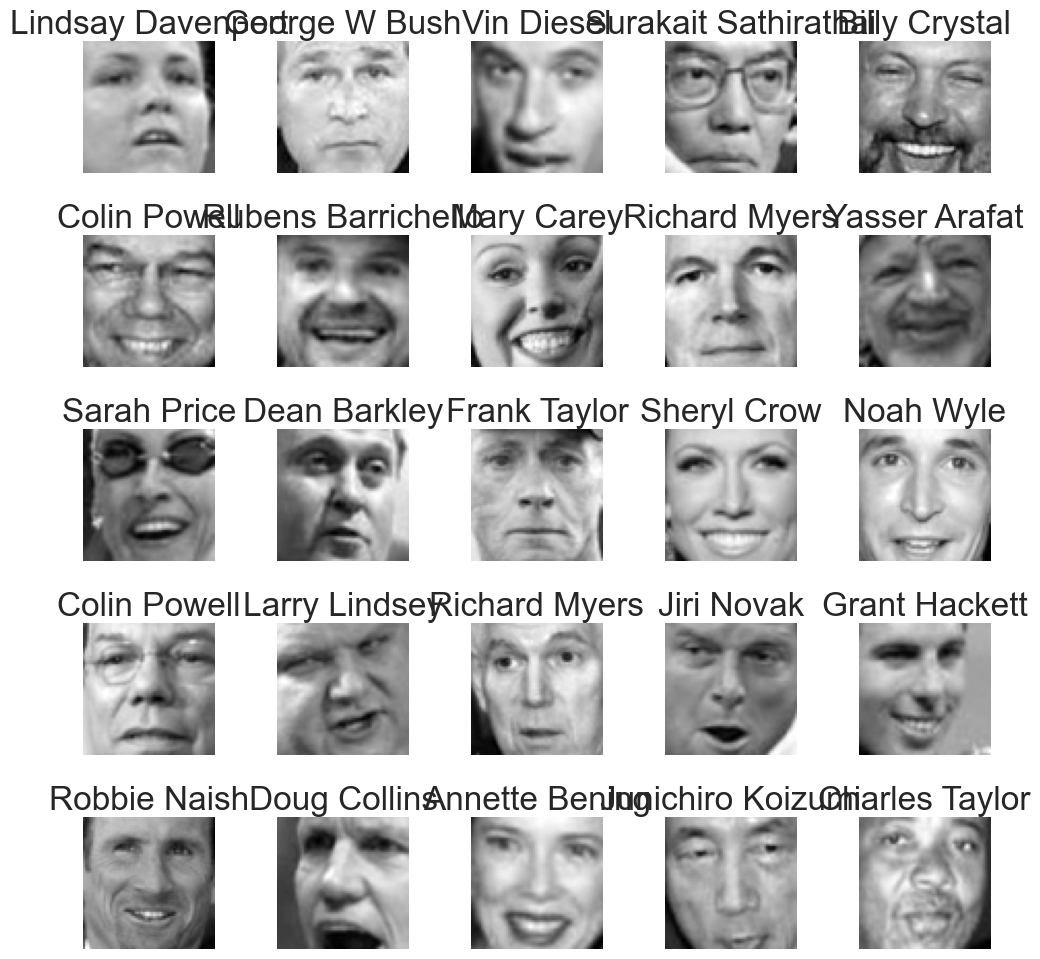

In [30]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    '''
    fig, axs = plt.subplots(5, 5, figsize=(10, 10))

    for i in range(5):
        for j in range(5):
            idx = i * 5 + j
            ax = axs[i, j]
            ax.imshow(face_imgs[idx], cmap=plt.get_cmap('gray'))
            ax.set_title(face_names[idx])
            ax.axis('off')

    plt.tight_layout()
    plt.show()
    
face_plot(face_imgs[:25], face_names[:25])

### "mean face"

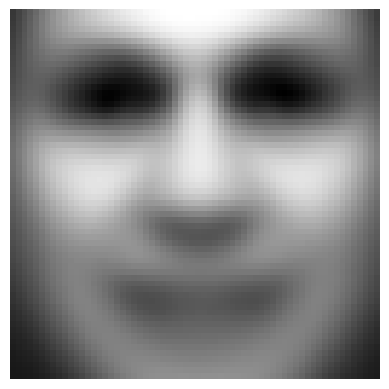

In [31]:
mean_face = np.mean(face_imgs, axis=0)

plt.imshow(mean_face, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

### Preprocess face data

In [32]:
N = face_imgs.shape[0]
M = face_imgs.shape[1] * face_imgs.shape[2]

face_imgs_vec = np.reshape(face_imgs, (N, M))

### Perform PCA on preprocessed face data

In [33]:
import time

face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

num_samples = face_imgs.shape[0]
face_data = face_imgs.reshape(num_samples, -1)
face_df = pd.DataFrame(face_data)
face_df.columns = range(face_df.shape[1])
pca_obj = pca_cov.PCA_COV(face_df)

start_time = time.time()
pca_obj.pca(list(range(4096)))
end_time = time.time()
elapsed_time = end_time - start_time
print("PCA processing time:", elapsed_time, "seconds")

PCA processing time: 37.76918578147888 seconds


### Make face PCA elbow plot

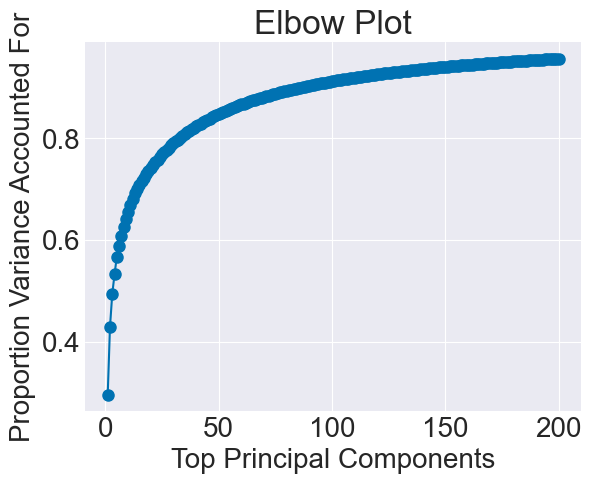

In [34]:
pca_obj.elbow_plot(num_pcs_to_keep=200)

### Reconstruct faces using the principal components

In [35]:
def make_imgs(reconstructed_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    
    img_size = int(np.sqrt(reconstructed_imgs.shape[1]))
    inflated_imgs = reconstructed_imgs.reshape(-1, img_size, img_size)
    
    return inflated_imgs

#### 50% variance face grid

num_pcs_50:  4


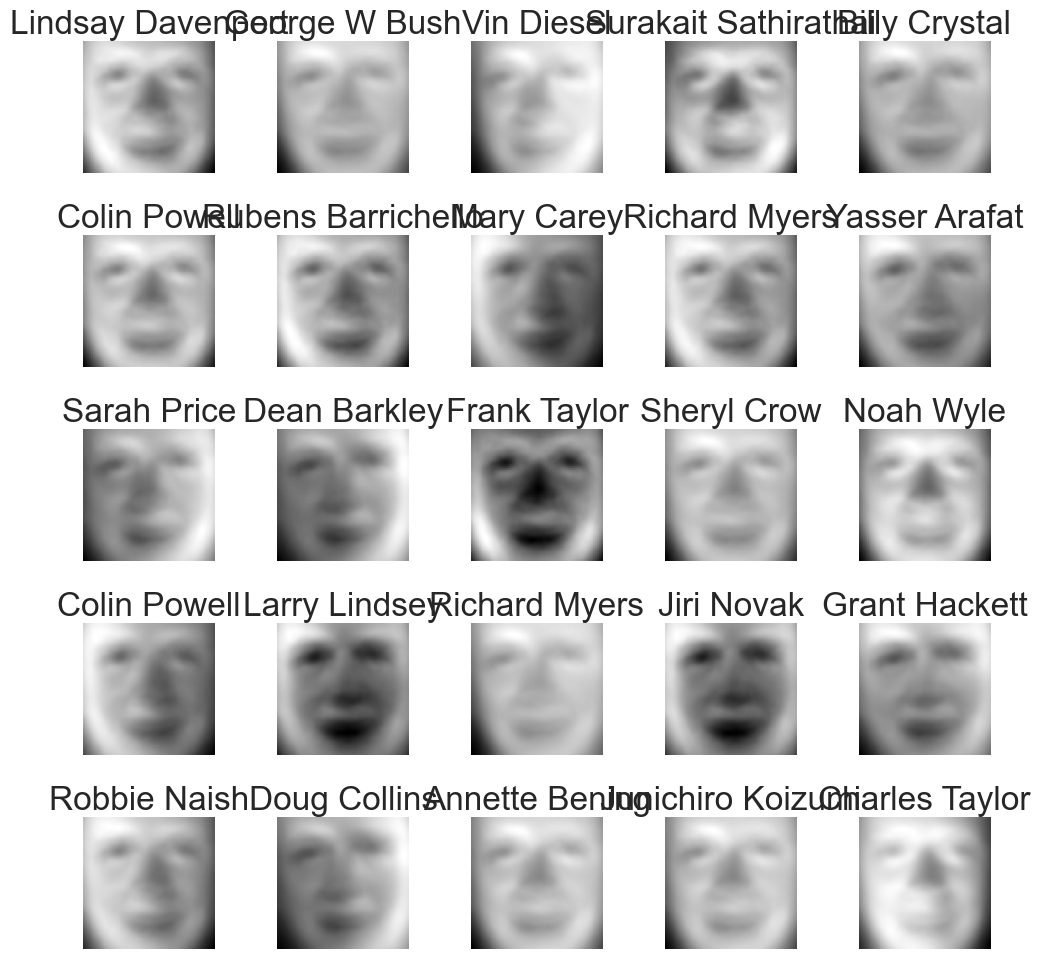

In [36]:
num_pcs_50 = pca_obj.variance_accounted_for(0.5)
print("num_pcs_50: ", num_pcs_50)
reconstructed_data_50 = pca_obj.pca_then_project_back(num_pcs_50)
inflated_imgs_50 = make_imgs(reconstructed_data_50)
face_plot(inflated_imgs_50, face_names)

#### 70% variance face grid

num_pcs_70:  15


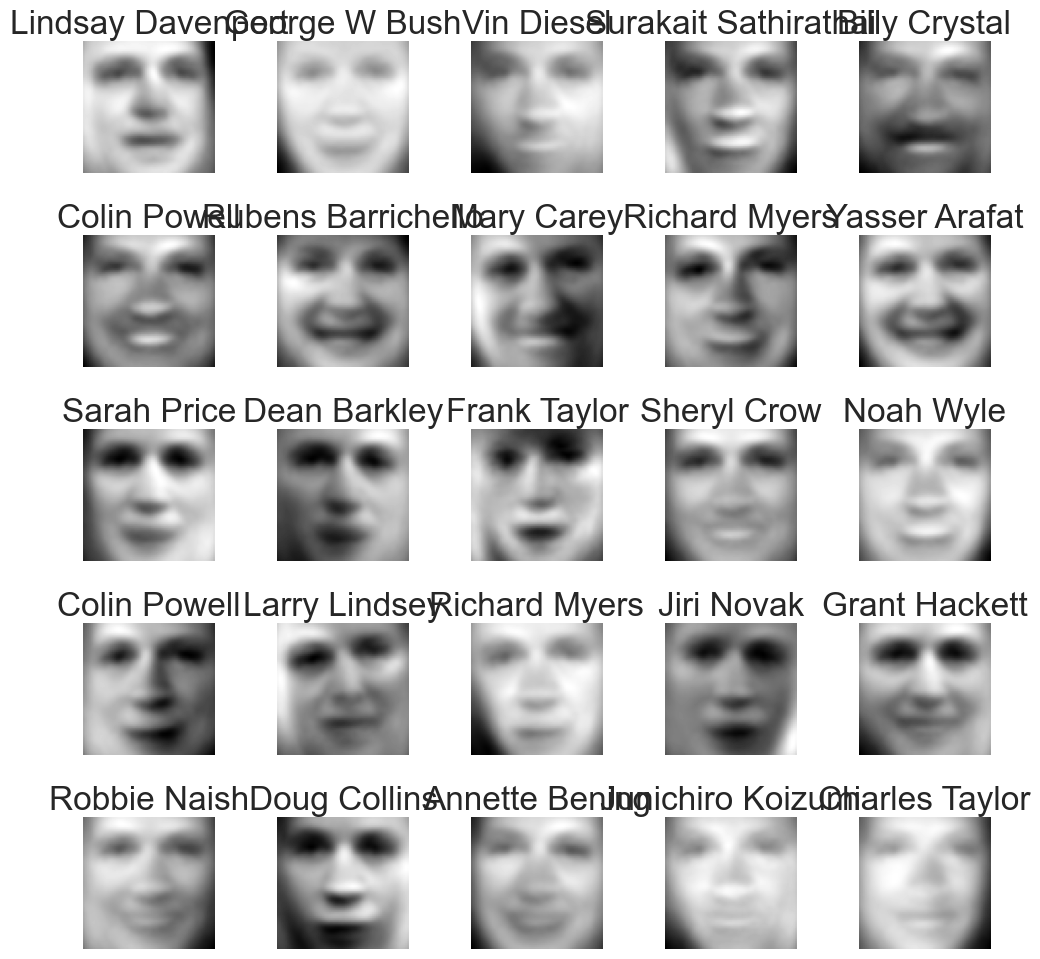

In [37]:
num_pcs_70 = pca_obj.variance_accounted_for(0.7)
print("num_pcs_70: ", num_pcs_70)
reconstructed_data_70 = pca_obj.pca_then_project_back(num_pcs_70)
inflated_imgs_70 = make_imgs(reconstructed_data_70)
face_plot(inflated_imgs_70, face_names)

#### 80% variance face grid

num_pcs_80:  33


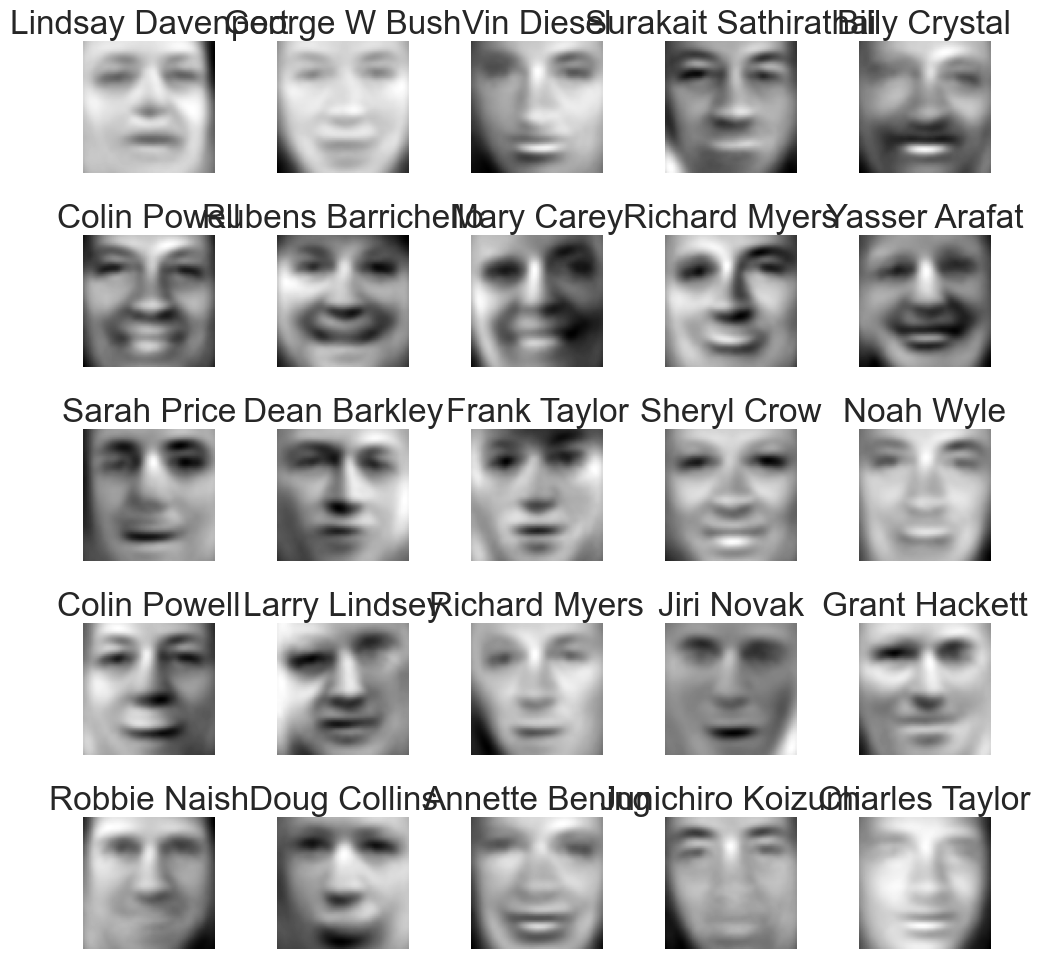

In [38]:
num_pcs_80 = pca_obj.variance_accounted_for(0.8)
print("num_pcs_80: ", num_pcs_80)
reconstructed_data_80 = pca_obj.pca_then_project_back(num_pcs_80)
inflated_imgs_80 = make_imgs(reconstructed_data_80)
face_plot(inflated_imgs_80, face_names)

#### 95% variance face grid

num_pcs_95:  180


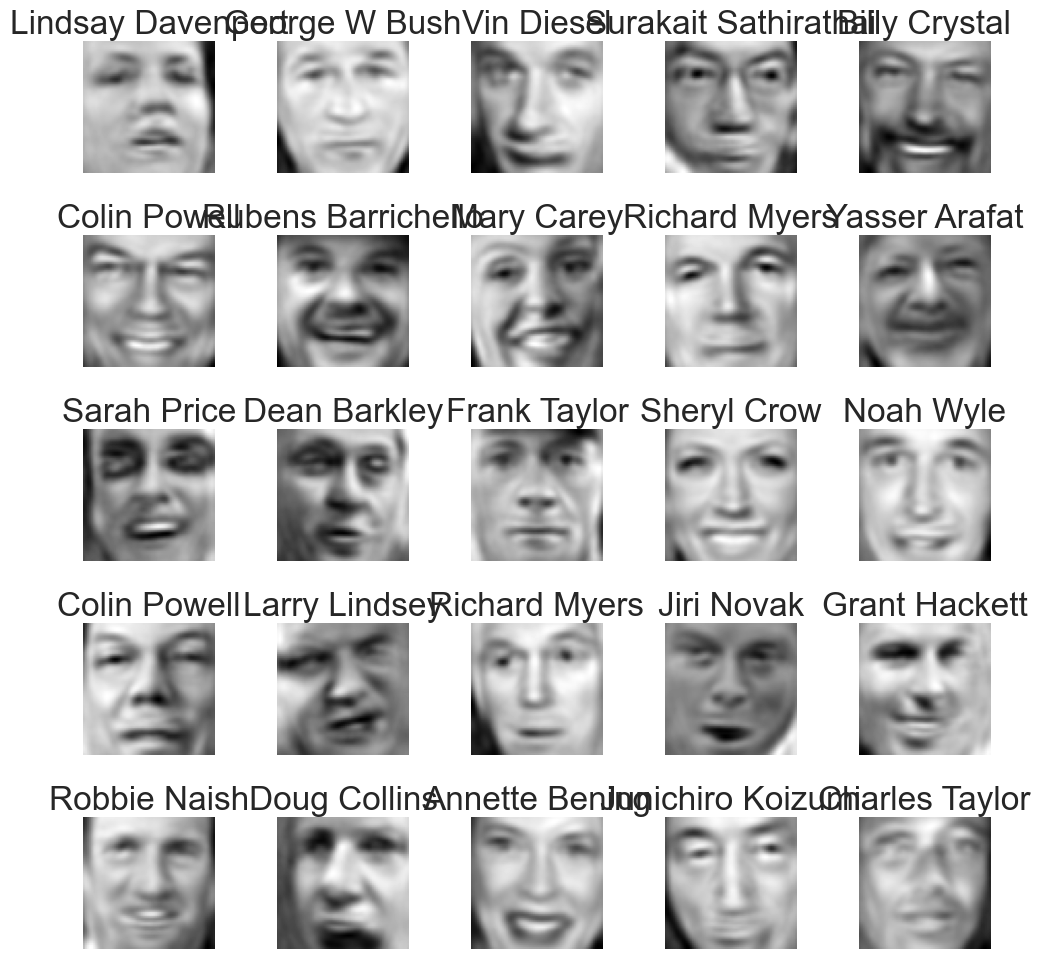

In [39]:
num_pcs_95 = pca_obj.variance_accounted_for(.95)
print("num_pcs_95: ", num_pcs_95)
reconstructed_data_95 = pca_obj.pca_then_project_back(num_pcs_95)
inflated_imgs_95 = make_imgs(reconstructed_data_95)
face_plot(inflated_imgs_95, face_names)